In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('../data/MushroomDataset/processed_secondary_data.csv')

In [42]:
data['class'] = data['class'].map({'e': 0, 'p': 1})
X = data.drop(columns=['class'])
y = data['class']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

In [45]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7777140985754053
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5436
           1       0.80      0.80      0.80      6778

    accuracy                           0.78     12214
   macro avg       0.77      0.78      0.78     12214
weighted avg       0.78      0.78      0.78     12214

Confusion Matrix:
 [[4086 1350]
 [1365 5413]]


In [48]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8593054217525384


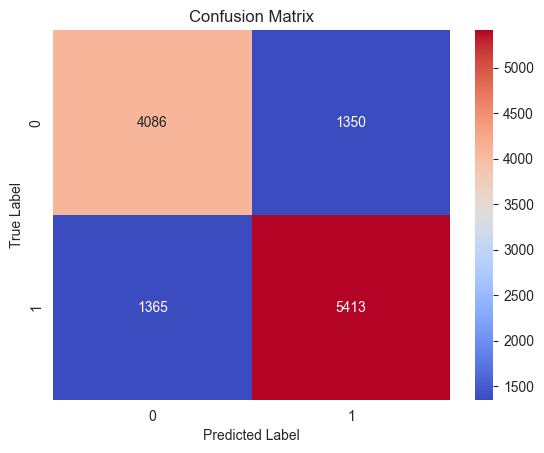

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()